In [2]:
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('../')

In [3]:
import cv2 as cv
from PIL import Image, ImageDraw
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
from src.utils.graphs import get_keypoints, relative_neighborhood, random_graph
from src.utils.visualize import draw_graph

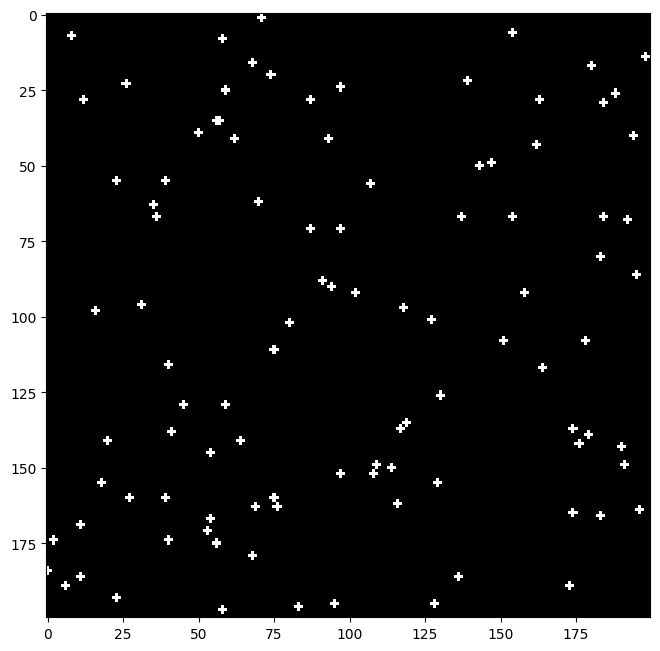

In [3]:
rG = random_graph(100,0)
arr = draw_graph(rG,radius=1)

In [4]:
keys = []
for idx, node in enumerate(rG._node):
    x = rG._node[idx]['x']
    y = rG._node[idx]['y']
    keys.append([x,y])

100%|█████████████████████████████████████████████████████████████████████████████| 286/286 [00:00<00:00, 28675.92it/s]

delaunay_triangulation
edges cleaning


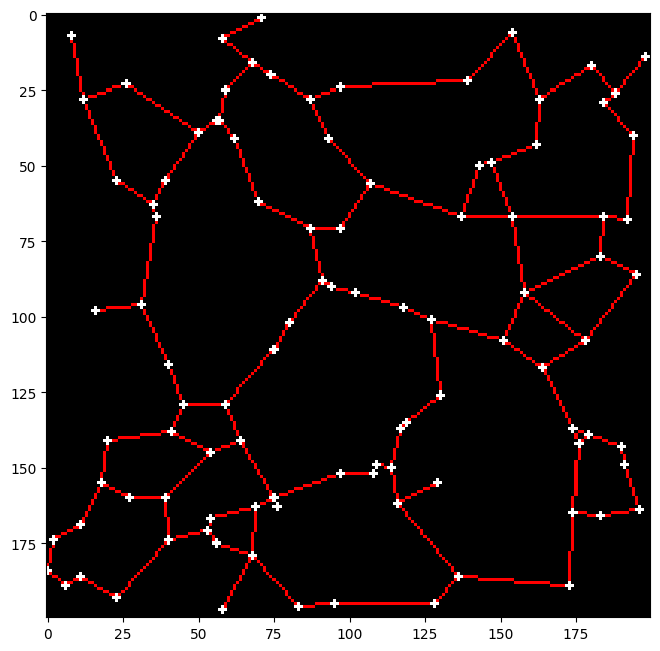

In [5]:
g = relative_neighborhood(keys)
arr = draw_graph(g)

In [6]:
#N_FEATURES_LIMIT = 7000
N_FEATURES_LIMIT = None

 46%|██████████████████████████████████▏                                        | 1421/3118 [00:00<00:00, 14106.83it/s]

keys: 1398
delaunay_triangulation
edges cleaning


100%|███████████████████████████████████████████████████████████████████████████| 3118/3118 [00:00<00:00, 12972.17it/s]


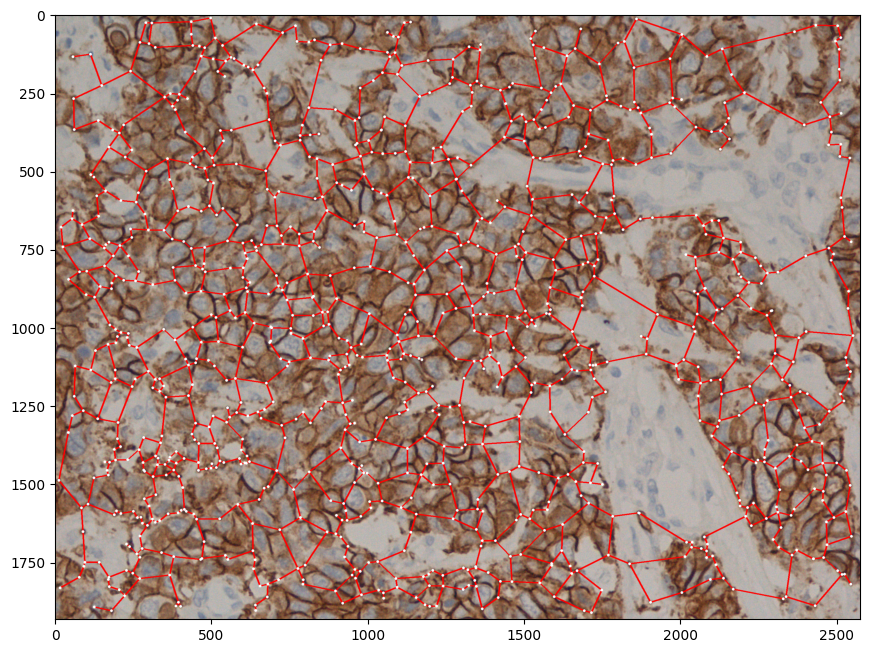

In [12]:
test_img_path = r"../test_images/test_img_2.tif"
img = Image.open(test_img_path)
img_arr = np.array(img)
sift = cv.SIFT_create(contrastThreshold=0.08,edgeThreshold=2,sigma=1.0)
keys = get_keypoints(img_arr,N_FEATURES_LIMIT,detector=sift)
print('keys:',len(keys))
g = relative_neighborhood(keys)
arr = draw_graph(g,img_orginal=img,radius=4,line_power=5)

 66%|█████████████████████████████████████████████████▌                         | 1528/2313 [00:00<00:00, 15169.06it/s]

delaunay_triangulation
edges cleaning


100%|███████████████████████████████████████████████████████████████████████████| 2313/2313 [00:00<00:00, 15670.08it/s]


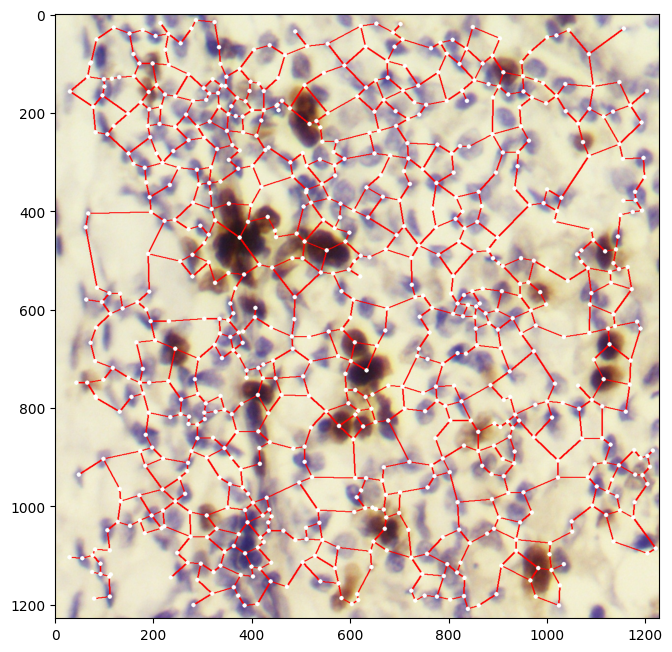

In [13]:
test_img_path = r"../test_images/test_img_3.jpg"
img = Image.open(test_img_path)
img_arr = np.array(img)
keys = get_keypoints(img_arr,N_FEATURES_LIMIT)
len(keys)
g = relative_neighborhood(keys)
arr = draw_graph(g,img_orginal=img,radius=4,line_power=3)

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def plot_comparasion(img_name):
    img = mpimg.imread('../../doc/_static/stinkbug.png')
    fig, axs = plt.subplots(2)
    imgplot = plt.imshow(img)

In [6]:
img = f"p1_0299_6"